## Checking the implementation

We run the algorithm with order 2 tensors (i.e. matrices) to check our implementation does what we expect it to do. Here we plot some graphs showing the achieved correlation.

DISCLAIMER: These results were obtained with an older version of the code which didn't use `jax`.

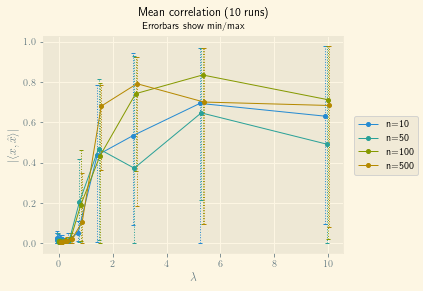

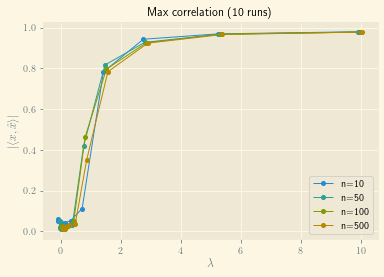

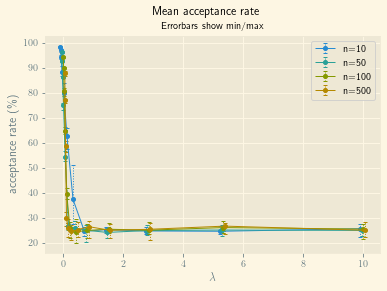

In [1]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os

# Loading the data
run = "corr_11-05-2022_22:30"
filename = f"./data/{run}.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

dims = list(set([l["dim"] for l in results]))
dims.sort()
n_dims = len(dims)

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


Now we plot some graphs about the time to convergence, in the case where the algorithm was successful. Here, we mean by being successful that the final correlation was above some arbitrary threshold. We take $0.5$ as our threshold here.

REVIEW this: not sure it filters correctly only the successful runs.

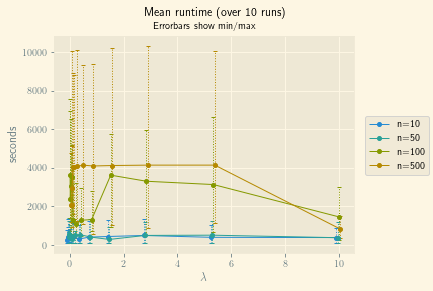

In [18]:
# Loading the data
run = "corr_11-05-2022_22:30"
filename = f"./data/{run}.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

runtimes = np.array([l["runtimes"] for l in results])

# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # number of iterations plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = np.mean(runtimes, axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = np.min(runtimes, axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = np.max(runtimes, axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(
        f"Mean runtime (over {n_runs} runs)",
        fontsize=12,
    )
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"seconds")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/n_iterations.png", dpi=900)


## Order 3

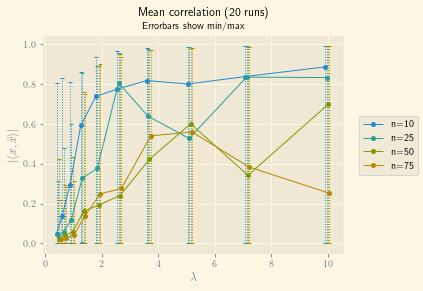

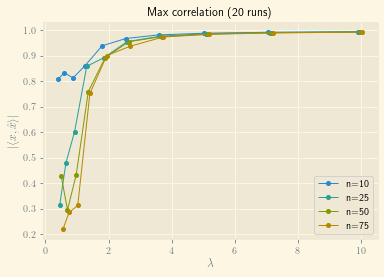

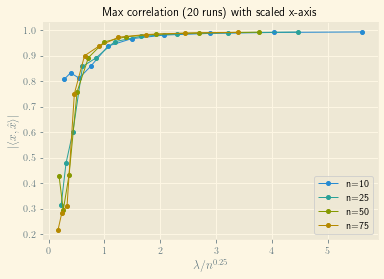

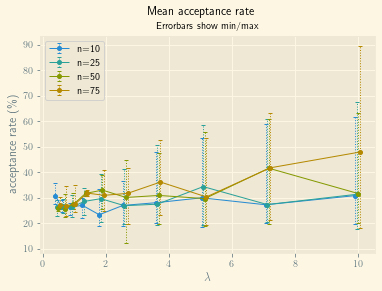

In [30]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os

# Loading the data
run = "corr__07-05-2022_21:34"
filename = f"./data/{run}.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

dims = list(set([l["dim"] for l in results]))
dims.sort()

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()

n_dims = len(dims)
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [correlation_list for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]

# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)
    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            lambdas / dim**0.25,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.25}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


### Order 4

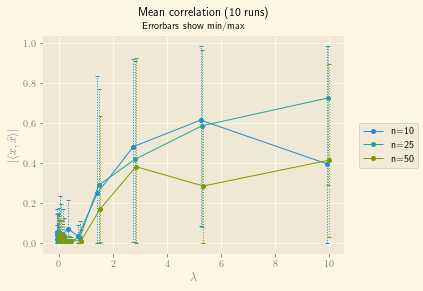

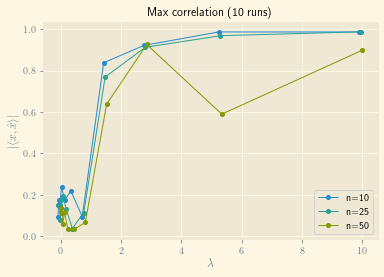

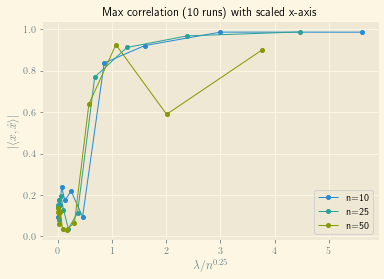

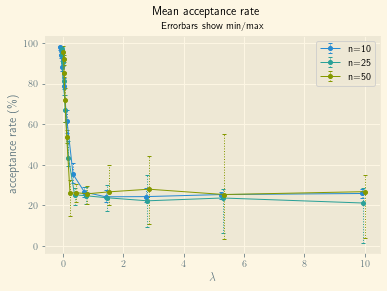

In [22]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
run = "corr_14-05-2022_06:08"
filename = f"./data/{run}.pkl"
with open(filename, "rb") as f:
    results = pickle.load(f)

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

results = list(chain(*results))

dims = list(set([l["dim"] for l in results]))
dims.sort()
n_dims = len(dims)

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            lambdas / dim**0.25,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.25}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


### Order 4 with `jax`

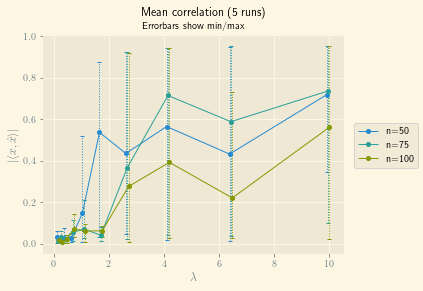

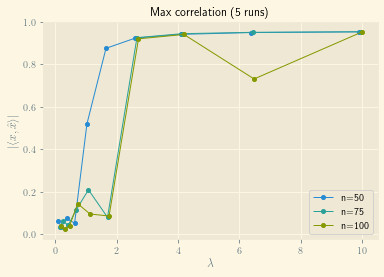

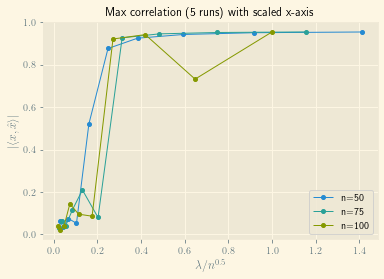

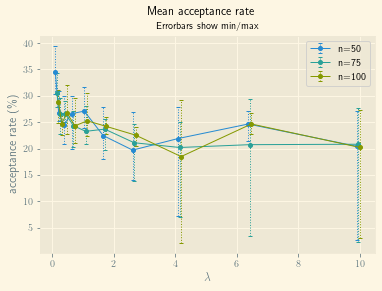

In [2]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os
from itertools import chain

# Loading the data
runs = [
        "n50_d4_18-05-2022_15:31.pkl",
        "n75_d4_18-05-2022_17:21.pkl",
        "n100_d4_18-05-2022_20:45.pkl",
        # "n125_d4_19-05-2022_11:19.pkl",
]
results = []
for run in runs:
    with open(f"./data/{run}", "rb") as f:
        results.extend(pickle.load(f))

run = run[8:]
if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

dims = list(set([l["dim"] for l in results]))
dims.sort()
n_dims = len(dims)

lambdas = list(set([l["lmbda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            lambdas / dim**0.5,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.5}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


In [23]:
results[0].keys()

dict_keys(['lambda', 'dim', 'estimated_spikes', 'correlations', 'acceptance_rates', 'n_swaps', 'runtimes'])

In [14]:
with open(f"./data/params/20-05-2022_09:17.pkl", "rb") as f:
    args = (pickle.load(f))

In [15]:
args

{'dim': 100,
 'order': 4,
 'cycles': 400,
 'cycle_length': 50,
 'warmup_cycles': 15,
 'warmup_cycle_length': 1000,
 'n_betas': 10,
 'swap_frequency': 5,
 'tol': 0.005,
 'tol_window': 20,
 'verbose': 1,
 'lambdas': array([10.        ,  6.47478803,  4.192288  ,  2.71441762,  1.75752787,
         1.13796204,  0.7368063 ,  0.47706646,  0.30889042,  0.2       ]),
 'seeds': array([8913, 1259, 5425, 1193, 2561])}